In [1]:
import pymongo
from pymongo import MongoClient
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
import warnings
from nbi1 import *
from numpy.random import randn
from scipy.stats import anderson
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import scipy

warnings.filterwarnings('ignore')

## Import Data

In [2]:
### Dataset without outliers
csv_file = "../data-generation/04-28-19-thesis-dataset-without-outliers_allstates"
df_wo = pd.read_csv(csv_file, index_col = 0)

## Normality Test

In [3]:
def normality_test(data):
    # normality test
    result = anderson(data)
    print("Anderson - Darling Test")
    print("---"*15)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks Gaussian (fail to reject H0) ' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look Gaussian (reject H0) ' % (sl, cv))
    print("\n")
    print("D’Agostino’s K^2 Test")
    print("---"*15)
    
    
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
        
    print("\n")
    print("Kolmogorov-Smirnov")
    print("---"*15)

    stat, p = scipy.stats.kstest(data, cdf='norm')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
        
    # q-q plot
    qqplot(data, line='s')
    pyplot.show()
    

### Results : Data without outliers

Anderson - Darling Test
---------------------------------------------
Statistic: 1245.463
15.000: 0.576, data does not look Gaussian (reject H0) 
10.000: 0.656, data does not look Gaussian (reject H0) 
5.000: 0.787, data does not look Gaussian (reject H0) 
2.500: 0.918, data does not look Gaussian (reject H0) 
1.000: 1.092, data does not look Gaussian (reject H0) 


D’Agostino’s K^2 Test
---------------------------------------------
Statistics=7051.848, p=0.000
Data does not look Gaussian (reject H0)


Kolmogorov-Smirnov
---------------------------------------------
Statistics=0.076, p=0.000
Data does not look Gaussian (reject H0)


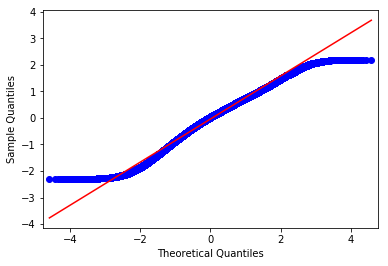

In [5]:
normality_test(df_wo["Baseline Difference Score"])

### Normality Test - Random Sample N = 100

Anderson - Darling Test
---------------------------------------------
Statistic: 2.120
15.000: 0.570, data does not look Gaussian (reject H0) 
10.000: 0.650, data does not look Gaussian (reject H0) 
5.000: 0.779, data does not look Gaussian (reject H0) 
2.500: 0.909, data does not look Gaussian (reject H0) 
1.000: 1.081, data does not look Gaussian (reject H0) 


D’Agostino’s K^2 Test
---------------------------------------------
Statistics=11.666, p=0.003
Data does not look Gaussian (reject H0)


Kolmogorov-Smirnov
---------------------------------------------
Statistics=0.072, p=0.029
Data does not look Gaussian (reject H0)


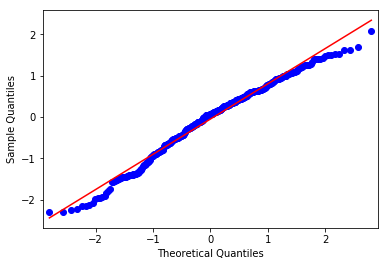

In [6]:
sample = df_wo["Baseline Difference Score"].sample(n=400)
normality_test(sample)

### Results : Data with outliers

### Baseline Difference Score - Summary Statistics


In [7]:
pd.set_option('float_format', '{:f}'.format)
pd.DataFrame(df_wo["Baseline Difference Score"].describe())

,Baseline Difference Score
count,435482.000000
mean,-0.044782
std,0.812483
min,-2.302015
25%,-0.548383
50%,0.034864
75%,0.511222
max,2.188783


In [8]:
sample_desc = pd.DataFrame(sample.describe())
sample_desc

,Baseline Difference Score
count,400.000000
mean,-0.050715
std,0.853409
min,-2.300500
25%,-0.565317
50%,0.066115
75%,0.562030
max,2.092221


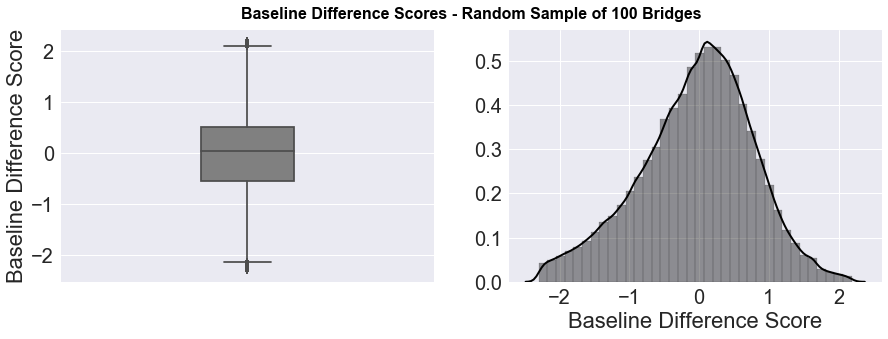

In [9]:

# Plotting Baseline Difference Scores
plt.figure(figsize=(12,4))
plt.subplots_adjust(bottom=0.025, left=0.025, top = 0.9, right=0.975)
plt.suptitle("Baseline Difference Scores - Random Sample of 100 Bridges", fontsize = 16,fontweight = 'bold')
sns.set(font_scale=2)
plt.subplot(1,2,1)
ax_1 = sns.boxplot(x = df_wo["Baseline Difference Score"], color = 'grey', orient='v', width=.25)


plt.subplot(1,2,2)
sns.distplot(df_wo['Baseline Difference Score'], hist=True, kde=True, 
             bins=int(180/5), color = 'Black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, label="US")
plt.show()

### Median

In [10]:
df_wo['Baseline Difference Score'].median()

0.03486448850564046